In [1]:
import pandas as pd
import numpy as np
import matplotlib.ticker
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 

In [2]:
df = pd.read_csv('Medical_insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(2772, 7)

In [5]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df.groupby('sex', as_index=False)['charges'].mean()

,sex,charges
0,female,12486.831977
1,male,14013.872721


In [8]:
# Calculate comprehensive statistics
gender_stats = df.groupby('sex').agg({
    'charges': ['mean', 'std', 'count', 'min', 'max', 'median']
}).reset_index()
gender_stats.columns = ['sex', 'mean', 'std', 'count', 'min', 'max', 'median']

# Create enhanced bar plot
fig_sex = px.bar(gender_stats,
                 x='sex', y='mean',
                 title='Average Medical Insurance charges by Gender',
                 labels={'mean': 'Average Insurance Charges ($)', 'sex': 'Gender'},
                 color='sex',
                 template='plotly_white',
                 text=gender_stats['mean'].round(2),
                 color_discrete_map={'female': '#FF69B4', 'male': '#4169E1'})

# Customize the traces
fig_sex.update_traces(
    textposition='outside',
    textfont=dict(size=11),
    texttemplate='$%{text:,.0f}',
    marker_line_color='rgb(8,48,107)',
    marker_line_width=1.5,
    opacity=0.85,
    width=0.3  # Made bars thinner
)

# Update layout with more compact dimensions
fig_sex.update_layout(
    title={
        'text': '<b>Average Medical Insurance charges by Gender</b>',
        'x': 0.5,
        'y': 0.95,
        'xanchor': 'center',
        'font': dict(size=20)
    },
    yaxis=dict(
        title='Average Insurance Charges',
        tickprefix="$",
        tickformat=",",
        gridcolor='#E5E5E5',
        title_standoff=20,
        range=[0, max(gender_stats['mean']) * 1.15]  # Reduced top margin
    ),
    xaxis=dict(
        title='Gender',
        ticktext=["Female", "Male"],
        tickvals=["female", "male"],
        title_standoff=20
    ),
    plot_bgcolor='white',
    height=500,  # Reduced height
    width=700,   # Reduced width
    showlegend=False,
    margin=dict(t=120, b=60, l=80, r=80),  # Reduced margins
    bargap=0.15  # Reduced gap between bars
)

# Add statistical insights boxes
for i, row in gender_stats.iterrows():
    stats_text = (
        f"<b>{row['sex'].title()} Statistics:</b><br>"
        f"Sample Size: {row['count']:,} patients<br>"
        f"Median Cost: ${row['median']:,.0f}<br>"
        f"Min Cost: ${row['min']:,.0f}<br>"
        f"Max Cost: ${row['max']:,.0f}<br>"
        f"Std Dev: ${row['std']:,.0f}"
    )
    
    fig_sex.add_annotation(
        x=row['sex'],
        y=row['mean']/2,
        text=stats_text,
        showarrow=False,
        font=dict(size=10),
        align='left',
        bgcolor='rgba(255,255,255,0.8)',
        bordercolor='rgba(0,0,0,0.3)',
        borderwidth=1,
        borderpad=3
    )

# Add key insights
avg_diff = abs(gender_stats.iloc[0]['mean'] - gender_stats.iloc[1]['mean'])
percent_diff = (avg_diff / gender_stats.iloc[0]['mean']) * 100

insights_text = (
    f"<b>Key Insights:</b><br>"
    f"• Male insurance costs are ${avg_diff:,.0f} higher on average ({percent_diff:.1f}% difference)<br>"
    f"• Total sample size: {gender_stats['count'].sum():,} patients<br>"
    f"• Overall average cost: ${df['charges'].mean():,.0f}"
)

fig_sex.add_annotation(
    text=insights_text,
    xref='paper', yref='paper',
    x=0.5, y=1.15,
    showarrow=False,
    font=dict(size=11),
    align='center',
    bgcolor='rgba(255,255,255,0.8)',
    bordercolor='rgba(0,0,0,0.3)',
    borderwidth=1,
    borderpad=3,
    xanchor='center'
)

fig_sex.show()

c:\Users\lalit\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotly\express\_core.py:1980: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


In [9]:
df.groupby('children', as_index=False)['charges'].mean()

,children,charges
0,0,12317.920881
1,1,12722.650521
2,2,15268.182723
3,3,15304.070620
4,4,13550.983876
5,5,8706.036629


In [10]:
# Create enhanced bar plot with fixed colors for each bar
children_data = df.groupby('children', as_index=False)['charges'].mean()

fig_children = px.bar(children_data,
                     x='children', y='charges',
                     labels={'charges': 'Average Insurance Charges ($)', 'children': 'Number of Children'},
                     template='plotly_white',
                     text=children_data['charges'].round(2))

# Update traces with brighter custom colors for each bar
fig_children.update_traces(
    marker_color=['#6A5ACD', '#9B59B6', '#E74C3C', '#3498DB', '#2ECC71', '#F1C40F'],  # Brighter color palette
    textposition='outside',
    textfont=dict(size=11),
    texttemplate='$%{text:,.0f}',
    marker_line_color='rgb(8,48,107)',
    marker_line_width=1.5,
    opacity=0.85,
    width=0.6
)

# Create combined title with insights
combined_title = (
    f"Average Medical Insurance Charges by Number of Children<br><br>"
    f"<span style='font-size: 14px;'>"
    f"Highest average cost: ${children_data['charges'].max():,.0f} ({children_data.loc[children_data['charges'].idxmax(), 'children']} children) | "
    f"Lowest average cost: ${children_data['charges'].min():,.0f} ({children_data.loc[children_data['charges'].idxmin(), 'children']} children) | "
    f"Overall average cost: ${children_data['charges'].mean():,.0f}"
    f"</span>"
)

# Update layout
fig_children.update_layout(
    title={
        'text': combined_title,
        'x': 0.5,
        'y': 0.95,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': dict(size=24)
    },
    yaxis=dict(
        title='Average Insurance Charges',
        tickprefix="$",
        tickformat=",",
        gridcolor='#E5E5E5',
        title_standoff=20
    ),
    xaxis=dict(
        title='Number of Children',
        tickmode='array',
        ticktext=['No Children', '1 Child', '2 Children', '3 Children', '4 Children', '5 Children'],
        tickvals=[0, 1, 2, 3, 4, 5],
        title_standoff=20
    ),
    plot_bgcolor='white',
    height=600,
    width=900,
    showlegend=False,
    margin=dict(t=120, b=80, l=80, r=80)
)

fig_children.show()

In [11]:
df.groupby('smoker', as_index=False)['charges'].mean()

,smoker,charges
0,no,8417.874411
1,yes,32223.139764


In [12]:
# Calculate average charges for smokers and non-smokers
smoker_data = df.groupby('smoker', as_index=False)['charges'].mean()

# Create bar plot with enhanced visuals
fig_smoker = px.bar(
    smoker_data,
    x='smoker', y='charges',
    labels={'charges': 'Average Insurance Charges ($)', 'smoker': 'Smoking Status'},
    template='plotly_white',
    text=smoker_data['charges'].round(2)
)

# Apply custom styling to bars
fig_smoker.update_traces(
    marker_color=['#3498DB', '#E74C3C'],  # Blue for Non-Smokers, Red for Smokers
    textposition='outside',
    textfont=dict(size=12),
    texttemplate='$%{text:,.0f}',  # Format text with dollar sign
    marker_line_color='rgb(8,48,107)',
    marker_line_width=1.5,
    opacity=0.85,
    width=0.8  # Increased width to remove space between bars
)

# Extract max, min, and overall average for insights
overall_avg = smoker_data['charges'].mean()

# Create combined title with insights
combined_title = (
    f"Average Medical Insurance Charches: Smokers vs Non-Smokers<br>"
    f"<span style='font-size: 14px;'>"
    f"Overall average: ${overall_avg:,.0f}"
    f"</span>"
)

# Update layout for better readability and remove extra space
fig_smoker.update_layout(
    title={
        'text': combined_title,
        'x': 0.5,
        'y': 0.95,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': dict(size=20)
    },
    yaxis=dict(
        title='Average Insurance Charges',
        tickprefix="$",
        tickformat=",",
        gridcolor='#E5E5E5',
        title_standoff=10
    ),
    xaxis=dict(
        title='Smoking Status',
        ticktext=['Non-Smoker', 'Smoker'],
        tickvals=['no', 'yes'],
        title_standoff=10
    ),
    plot_bgcolor='white',
    height=500,
    width=700,
    showlegend=False,
    margin=dict(t=100, b=60, l=60, r=60),
    bargap=0  # Remove space between bars
)

fig_smoker.show()


In [13]:
df.groupby('region', as_index=False)['charges'].mean()

,region,charges
0,northeast,13475.874737
1,northwest,12463.129315
2,southeast,14748.777706
3,southwest,12164.196435


In [14]:
# Calculate average charges for each region
region_data = df.groupby('region', as_index=False)['charges'].mean()

# Create bar plot with enhanced visuals
fig_region = px.bar(
    region_data,
    x='region', y='charges',
    labels={'charges': 'Average Insurance Charges ($)', 'region': 'Region'},
    template='plotly_white',
    text=region_data['charges'].round(2)
)

# Apply custom styling to bars
fig_region.update_traces(
    marker_color=['#3498DB', '#E74C3C', '#2ECC71', '#F1C40F'],  # Distinct colors for each region
    textposition='outside',
    textfont=dict(size=12),
    texttemplate='$%{text:,.0f}',  # Format text with dollar sign
    marker_line_color='rgb(8,48,107)',
    marker_line_width=1.5,
    opacity=0.85,
    width=0.8  # Increased width to remove space between bars
)

# Extract max, min, and overall average for insights
max_charge = region_data['charges'].max()
min_charge = region_data['charges'].min()
overall_avg = region_data['charges'].mean()
max_region = region_data.loc[region_data['charges'].idxmax(), 'region'].capitalize()
min_region = region_data.loc[region_data['charges'].idxmin(), 'region'].capitalize()

# Create combined title with insights
combined_title = (
    f"Average Medical Insurance Charges by Region<br>"
    f"<span style='font-size: 14px;'>"
    f"Highest: ${max_charge:,.0f} ({max_region}) | "
    f"Lowest: ${min_charge:,.0f} ({min_region}) | "
    f"Overall: ${overall_avg:,.0f}"
    f"</span>"
)

# Update layout for better readability and remove extra space
fig_region.update_layout(
    title={
        'text': combined_title,
        'x': 0.5,
        'y': 0.95,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': dict(size=20)
    },
    yaxis=dict(
        title='Average Insurance Charges',
        tickprefix="$",
        tickformat=",",
        gridcolor='#E5E5E5',
        title_standoff=10
    ),
    xaxis=dict(
        title='Region',
        ticktext=["Northeast", "Northwest", "Southeast", "Southwest"],
        tickvals=["northeast", "northwest", "southeast", "southwest"],
        title_standoff=10
    ),
    plot_bgcolor='white',
    height=500,
    width=700,
    showlegend=False,
    margin=dict(t=100, b=60, l=60, r=60),
    bargap=0  # Remove space between bars
)

fig_region.show()


In [15]:
# Create scatter plot
fig_age = px.scatter(
    df, x='age', y='charges',
    title='Insurance Charges by Age',
    labels={'age': 'Age (Years)', 'charges': 'Insurance Charges ($)'},
    trendline="ols",
    template='plotly_white',
    color='smoker',
    hover_data={'bmi': True, 'sex': True, 'children': True, 'age': False, 'charges': False},  # Better hover clarity
    color_discrete_map={'yes': 'crimson', 'no': 'royalblue'}  # Custom colors for smoking status
)

# Customize layout
fig_age.update_layout(
    title_x=0.5,
    title_font=dict(size=22, family="Arial Black", color="black"),
    xaxis_title_font=dict(size=16, family="Arial", color="black"),
    yaxis_title_font=dict(size=16, family="Arial", color="black"),
    yaxis=dict(tickprefix="$", tickfont=dict(size=14), gridcolor='lightgray'),  # Add grid color
    xaxis=dict(tickfont=dict(size=14), gridcolor='lightgray'),
    plot_bgcolor='white',
    paper_bgcolor='white',
    showlegend=True,
    legend_title_text='Smoking Status',
    legend=dict(font=dict(size=14), bordercolor='black', borderwidth=1)  # Add border to legend
)

# Update markers with better styling
fig_age.update_traces(
    marker=dict(size=10, opacity=0.8, line=dict(width=1.5, color='black')),
    selector=dict(mode='markers')
)

# Update trendline appearance
fig_age.update_traces(
    line=dict(color='red', width=3, dash='dash'),
    selector=dict(type='scatter', mode='lines')
)

# Show plot
fig_age.show()


c:\Users\lalit\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotly\express\_core.py:1980: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [16]:
# Create scatter plot
fig_bmi = px.scatter(
    df, x='bmi', y='charges',
    title='Insurance Charges by BMI',
    labels={'bmi': 'Body Mass Index (BMI)', 'charges': 'Insurance Charges ($)'},
    trendline="ols",
    template='plotly_white',
    color='smoker',
    hover_data={'age': True, 'sex': True, 'children': True, 'bmi': False, 'charges': False},  # Improved hover clarity
    color_discrete_map={'yes': 'crimson', 'no': 'royalblue'}  # Custom colors for smoking status
)

# Customize layout
fig_bmi.update_layout(
    title_x=0.5,
    title_font=dict(size=22, family="Arial Black", color="black"),
    xaxis_title_font=dict(size=16, family="Arial", color="black"),
    yaxis_title_font=dict(size=16, family="Arial", color="black"),
    yaxis=dict(tickprefix="$", tickfont=dict(size=14), gridcolor='lightgray'),
    xaxis=dict(tickfont=dict(size=14), gridcolor='lightgray'),
    plot_bgcolor='white',
    paper_bgcolor='white',
    showlegend=True,
    legend_title_text='Smoking Status',
    legend=dict(font=dict(size=14), bordercolor='black', borderwidth=1)
)

# Update marker appearance
fig_bmi.update_traces(
    marker=dict(size=10, opacity=0.8, line=dict(width=1.5, color='black')),
    selector=dict(mode='markers')
)

# Update trendline appearance
fig_bmi.update_traces(
    line=dict(color='red', width=3, dash='dash'),
    selector=dict(type='scatter', mode='lines')
)

# Add BMI category reference lines with improved annotations
fig_bmi.add_hline(y=df['charges'].mean(), line_dash="dot", line_color="gray", annotation_text="Mean Charges", annotation_position="top left")
fig_bmi.add_vline(x=18.5, line_dash="dot", line_color="blue", annotation_text="Underweight", annotation_position="top")
fig_bmi.add_vline(x=24.9, line_dash="dot", line_color="green", annotation_text="Normal", annotation_position="top")
fig_bmi.add_vline(x=29.9, line_dash="dot", line_color="orange", annotation_text="Overweight", annotation_position="top")
fig_bmi.add_vline(x=35, line_dash="dot", line_color="red", annotation_text="Obese", annotation_position="top")

# Show plot
fig_bmi.show()


c:\Users\lalit\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotly\express\_core.py:1980: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [17]:
# Calculate correlation matrix
numerical_features = ['age', 'bmi', 'children', 'charges']
corr_matrix = df[numerical_features].corr()

# Create improved heatmap
fig = px.imshow(corr_matrix,
                text_auto=True,  # Show full precision values
                title='Correlation Matrix of Medical Insurance Features',
                labels={'color': 'Correlation<br>Coefficient'},
                color_continuous_scale='RdBu_r',  # Red-Blue diverging colorscale
                aspect='auto')  # Maintain square aspect ratio

# Customize layout
fig.update_layout(
    title_x=0.5,  # Center title
    title_font=dict(size=20),
    width=700,  # Fixed width
    height=700,  # Fixed height
    xaxis_title='Features',
    yaxis_title='Features',
    xaxis={'side': 'bottom'},  # Move x-axis labels to bottom
    coloraxis_colorbar=dict(
        title_font=dict(size=14),
        tickfont=dict(size=12),
        len=0.75,  # Adjust colorbar length
    )
)

# Update axis labels
fig.update_traces(
    textfont=dict(size=14),  # Increase correlation value text size
    hoverongaps=False  # Disable hover on empty cells
)

# Improve axis labels
feature_labels = {
    'age': 'Age',
    'bmi': 'BMI',
    'children': 'Children',
    'charges': 'Charges'
}
fig.update_xaxes(ticktext=list(feature_labels.values()), 
                 tickvals=list(range(len(feature_labels))),
                 tickfont=dict(size=12))
fig.update_yaxes(ticktext=list(feature_labels.values()), 
                 tickvals=list(range(len(feature_labels))),
                 tickfont=dict(size=12))

fig.show()

In [18]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

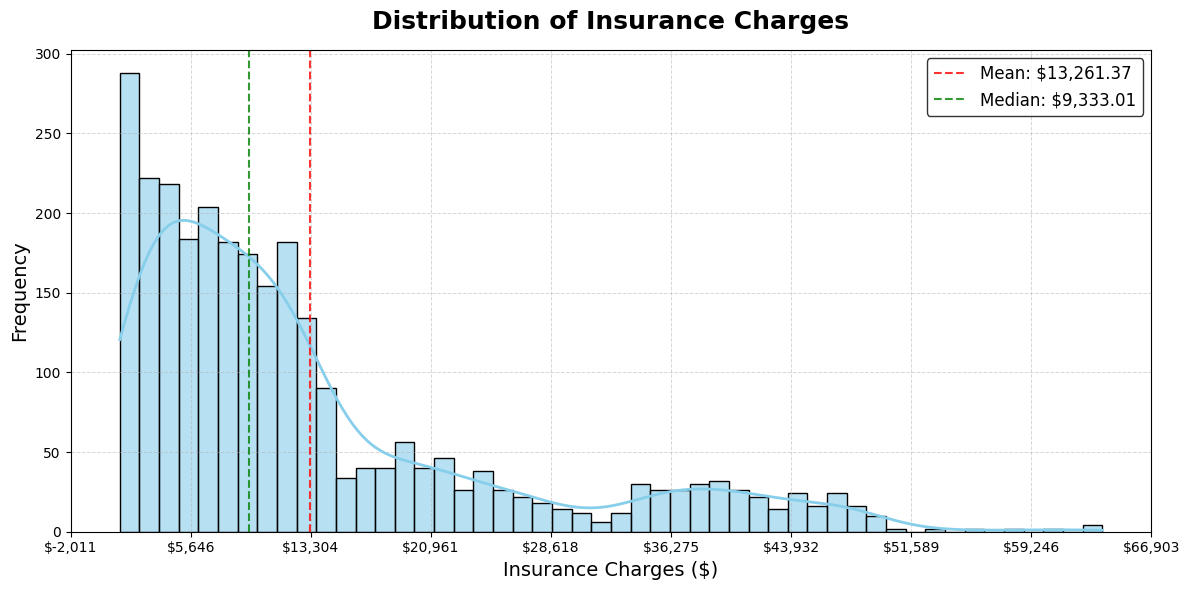

In [19]:
# Create figure with custom size
plt.figure(figsize=(12, 6))

# Create the histogram with improved styling
sns.histplot(data=df, x='charges', bins=50, kde=True, color='skyblue', 
            line_kws={'color': 'red', 'linewidth': 2}, alpha=0.6)  # Added transparency for better visibility

# Customize the plot
plt.title('Distribution of Insurance Charges', fontsize=18, pad=15, fontweight='bold')  # Increased font size and made it bold
plt.xlabel('Insurance Charges ($)', fontsize=14)  # Increased font size
plt.ylabel('Frequency', fontsize=14)  # Increased font size

# Format x-axis to show currency in thousands properly
ax = plt.gca()
# Get current axis limits
xlim = ax.get_xlim()
# Create fixed locator points
loc = matplotlib.ticker.FixedLocator(np.linspace(xlim[0], xlim[1], 10))
# Create formatter for currency
formatter = matplotlib.ticker.FuncFormatter(lambda x, p: f'${x:,.0f}')
ax.xaxis.set_major_locator(loc)
ax.xaxis.set_major_formatter(formatter)

# Add grid for better readability
plt.grid(True, alpha=0.5, linestyle='--', linewidth=0.7)  # Increased grid visibility

# Add mean and median lines with annotations
mean_charge = df['charges'].mean()
median_charge = df['charges'].median()
plt.axvline(mean_charge, color='red', linestyle='--', alpha=0.8, 
            label=f'Mean: ${mean_charge:,.2f}')
plt.axvline(median_charge, color='green', linestyle='--', alpha=0.8, 
            label=f'Median: ${median_charge:,.2f}')

# Add legend with a background for better visibility
plt.legend(fontsize=12, loc='upper right', frameon=True, facecolor='white', edgecolor='black')

# Adjust layout
plt.tight_layout()

plt.show()

In [20]:
df['charges'].max(), df['charges'].min(), df['charges'].mean()

(63770.42801, 1121.8739, 13261.369959046897)